In [1]:
# Importing the standard Python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Actor Specific Problem Formulations

In [2]:
# Loading in the necessary modules for EMA workbench and functions
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport

from problem_formulation import sum_over

In [3]:
# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

# Loading in all the 17 objectives via predefined problem formulation 3
if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    dike_model = get_model_for_problem_formulation(3)

[MainProcess/INFO] model initialized


In [4]:
# Replicate the uncertainties
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [5]:
# Replicate the levers
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [6]:
# Replicate the objectives
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage')
ScalarOutcome('A.1_Dike Investment Costs')
ScalarOutcome('A.1_Expected Number of Deaths')
ScalarOutcome('A.2_Expected Annual Damage')
ScalarOutcome('A.2_Dike Investment Costs')
ScalarOutcome('A.2_Expected Number of Deaths')
ScalarOutcome('A.3_Expected Annual Damage')
ScalarOutcome('A.3_Dike Investment Costs')
ScalarOutcome('A.3_Expected Number of Deaths')
ScalarOutcome('A.4_Expected Annual Damage')
ScalarOutcome('A.4_Dike Investment Costs')
ScalarOutcome('A.4_Expected Number of Deaths')
ScalarOutcome('A.5_Expected Annual Damage')
ScalarOutcome('A.5_Dike Investment Costs')
ScalarOutcome('A.5_Expected Number of Deaths')
ScalarOutcome('RfR Total Costs')
ScalarOutcome('Expected Evacuation Costs')


In [7]:
# Import ScalarOutcome from ema_workbench to define the actor specific outcomes of interest in the next function
from ema_workbench import ScalarOutcome

In [8]:
# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor):
   
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE
    
    model.uncertainties = uncertainties
    model.levers = levers

    if problem_formulation_actor == 4: # RWS
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage',
                            variable_name=['{}_Expected Annual Damage'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction),

            ScalarOutcome('Total Investment Costs',
                            variable_name=['{}_Dike Investment Costs'.format(dike)
                                                for dike in function.dikelist] + ['RfR Total Costs'
                                                                                ] + ['Expected Evacuation Costs'],
                            function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths',
                            variable_name=['{}_Expected Number of Deaths'.format(dike)
                                                for dike in function.dikelist],
                            function=sum_over, kind=direction)] 
    
    elif problem_formulation_actor == 5: # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A1-4',
                            variable_name=['A.1_Expected Annual Damage' ,'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage'], function=sum_over, kind=direction),

            ScalarOutcome('Investment Costs A1-4',
                            variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs'], function=sum_over, kind=direction),

            ScalarOutcome('Expected Number of Deaths in A1-4',
                            variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths'], function=sum_over, kind=direction)]
    
    elif problem_formulation_actor == 6: # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome('Expected Annual Damage A5', variable_name=['A.5_Expected Annual Damage'], kind=direction),

            ScalarOutcome('Investment Costs A5', variable_name=['A.5_Dike Investment Costs'], kind=direction),

            ScalarOutcome('Expected Number of Deaths in A5', variable_name=['A.5_Expected Number of Deaths'], kind=direction)]
    
    else:
        raise TypeError('unknown identifier')
    return model

In [9]:
# Loading in the right problem formulation, in this case for Rijkswaterstaat
model = problem_formulation_actor(4)

[MainProcess/INFO] model initialized


In [10]:
# Check the levers
for outcome in model.levers:
    print(repr(outcome))

IntegerParameter('A.1_DikeIncrease', 0, 10)
IntegerParameter('A.2_DikeIncrease', 0, 10)
IntegerParameter('A.3_DikeIncrease', 0, 10)
IntegerParameter('A.4_DikeIncrease', 0, 10)
IntegerParameter('A.5_DikeIncrease', 0, 10)
IntegerParameter('0_RfR', 0, 1)
IntegerParameter('1_RfR', 0, 1)
IntegerParameter('2_RfR', 0, 1)
IntegerParameter('3_RfR', 0, 1)
IntegerParameter('4_RfR', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)


In [11]:
# Check the uncertainties
for outcome in model.uncertainties:
    print(repr(outcome))

RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])
CategoricalParameter('discount rate', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)


In [12]:
# Check is the right objectives are loaded in
for outcome in model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=['A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'], function=<function sum_over at 0x000001F347115840>)
ScalarOutcome('Total Investment Costs', variable_name=['A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'], function=<function sum_over at 0x000001F347115840>)
ScalarOutcome('Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'], function=<function sum_over at 0x000001F347115840>)


# MORDM

#### Testing robustness of solution for Rijkswaterstaat in multiple scenarios

In [13]:
# Here, the solution-levers are defined in dictionaries, for further robustness tests
from ema_workbench import Policy
import pandas as pd
solution_policy1 = {'A.1_DikeIncrease': 0, 'A.2_DikeIncrease': 0, 'A.3_DikeIncrease': 0, 'A.4_DikeIncrease': 0, 'A.5_DikeIncrease': 4, '0_RfR': 0, '1_RfR': 1, '2_RfR': 1, '3_RfR': 1, '4_RfR': 1, 'EWS_DaysToThreat': 3}
solution_policy2 = {'A.1_DikeIncrease': 0, 'A.2_DikeIncrease': 0, 'A.3_DikeIncrease': 0, 'A.4_DikeIncrease': 0, 'A.5_DikeIncrease': 4, '0_RfR': 1, '1_RfR': 0, '2_RfR': 1, '3_RfR': 1, '4_RfR': 1, 'EWS_DaysToThreat': 3}
solution_policy3 = {'A.1_DikeIncrease': 0, 'A.2_DikeIncrease': 0, 'A.3_DikeIncrease': 0, 'A.4_DikeIncrease': 0, 'A.5_DikeIncrease': 0, '0_RfR': 0, '1_RfR': 1, '2_RfR': 1, '3_RfR': 1, '4_RfR': 1, 'EWS_DaysToThreat': 3}
solution_policy4 = {'A.1_DikeIncrease': 0, 'A.2_DikeIncrease': 0, 'A.3_DikeIncrease': 0, 'A.4_DikeIncrease': 0, 'A.5_DikeIncrease': 0, '0_RfR': 1, '1_RfR': 0, '2_RfR': 1, '3_RfR': 1, '4_RfR': 1, 'EWS_DaysToThreat': 3}

# The solutions are stored in dataframes
sol1 = pd.DataFrame.from_dict(solution_policy1, orient = 'index')
sol2 = pd.DataFrame.from_dict(solution_policy2, orient = 'index')
sol3 = pd.DataFrame.from_dict(solution_policy3, orient = 'index')
sol4 = pd.DataFrame.from_dict(solution_policy4, orient = 'index')

sol1 = sol1.T
sol2 = sol2.T
sol3 = sol3.T
sol4 = sol4.T

# And are added to one dataframe, index is reset
sol = sol1.append([sol2, sol3, sol4],ignore_index=True)
sol

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat
0,0,0,0,0,4,0,1,1,1,1,3
1,0,0,0,0,4,1,0,1,1,1,3
2,0,0,0,0,0,0,1,1,1,1,3
3,0,0,0,0,0,1,0,1,1,1,3


In [14]:
# The preferred solution is defined in a list, to enable experimenting with it
solution_policies = []

for i, policy in sol.iterrows():
    solution_policies.append(Policy(str(i), **policy.to_dict()))
    
type(solution_policies)

list

In [15]:
# Testing the robustness of the proposed solution for 1000 random scenarios
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    sol1_results = evaluator.perform_experiments(n_scenarios,
                                            solution_policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 2800 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 3600 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
sol_results = sol1_results

In [17]:
# Saving the results
from ema_workbench import save_results

save_results(sol_results, 'MORDM_reevaluation_RIJKSWATERSTAAT.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\LocalAdmin\Google Drive\EPAself\Model-Based Decision-Making\epa1361_open-master\final assignment\MORDM_reevaluation_RIJKSWATERSTAAT.tar.gz


In [15]:
# Loading in the results again
from ema_workbench import load_results

results_reevaluation_RWS = load_results('MORDM_reevaluation_RIJKSWATERSTAAT.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\Anne Boijmans\Documents\EPA\EPA1361\UPDATE3\final assignment\MORDM_reevaluation_RIJKSWATERSTAAT.tar.gz


In [16]:
# Defining a function to calculate the signal-to-noise ratio, a robustness metric
def s_to_n(sol_results, direction):
    mean = np.mean(sol_results)
    std = np.std(sol_results)
    
    if direction==ScalarOutcome.MAXIMIZE:
        return mean/std
    else:
        return mean*std

In [17]:
# In this piece of code, the signal-to-noise ratios are calculated, by iterating over the policies and outcomes
# Finally, the results are stored in a dataframe
experiments, outcomes = results_reevaluation_RWS

overall_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    
    logical = experiments['policy']==policy
    
    for outcome in model.outcomes:
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value, outcome.kind)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores
scores = pd.DataFrame.from_dict(overall_scores).T
scores

,Expected Annual Damage,Expected Number of Deaths,Total Investment Costs
0,6.194257e+16,0.001170,6.104595e+12
1,5.812434e+16,0.001127,4.845434e+12
2,7.269714e+16,0.001347,6.351118e+12
3,6.864640e+16,0.001302,4.984017e+12


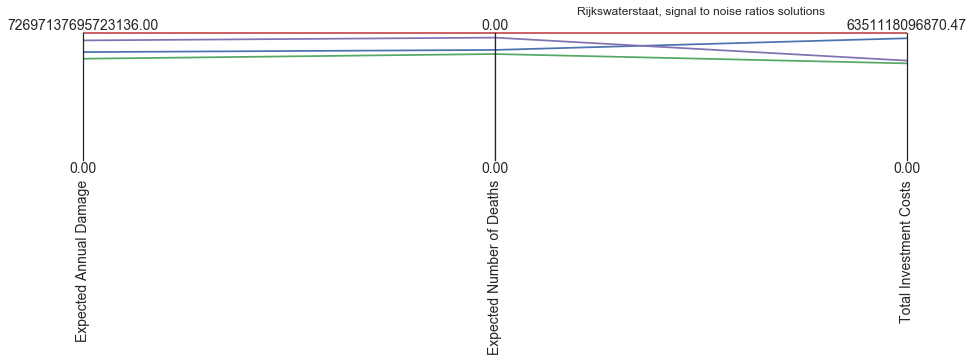

In [23]:
# The signal-to-noise metrics are also plotted to show the trade-offs between the outcomes of interest
from ema_workbench.analysis import parcoords

sol_data = scores
sol_limits = parcoords.get_limits(sol_data)
sol_limits.loc[0, ['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths']] = 0

paraxes = parcoords.ParallelAxes(sol_limits)
paraxes.plot(sol_data)
plt.title('Rijkswaterstaat, signal to noise ratios solutions')

# Set figure size
# Run this twice, to get a nice broad view
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


plt.show()

In [19]:
# With 'regret' the outcomes of interest for the various scenarios are compared
# to the scenario that provides the most preferred outcomes
experiments, outcomes = results_reevaluation_RWS

sol_regret = {}
sol_max_regret = {}
for outcome in model.outcomes:
    policy_column = experiments['policy']
    
    # create a DataFrame with all the relevent information
    # i.e., policy, scenario_id, and scores
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario_id":experiments['scenario_id']})
    
    # reorient the data by indexing with policy and scenario id
    data = data.pivot(index='scenario_id', columns='policy')
    
    # flatten the resulting hierarchical index resulting from 
    # pivoting, (might be a nicer solution possible)
    data.columns = data.columns.get_level_values(1)
   
    # we need to control the broadcasting. 
    # max returns a 1d vector across scenario id. By passing
    # np.newaxis we ensure that the shape is the same as the data
    # next we take the absolute value
    
    # basically we take the difference of the maximum across 
    # the row and the actual values in the row
    
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
   
    sol_regret[outcome.name] = sol_regret
    sol_max_regret[outcome.name] = outcome_regret.max()

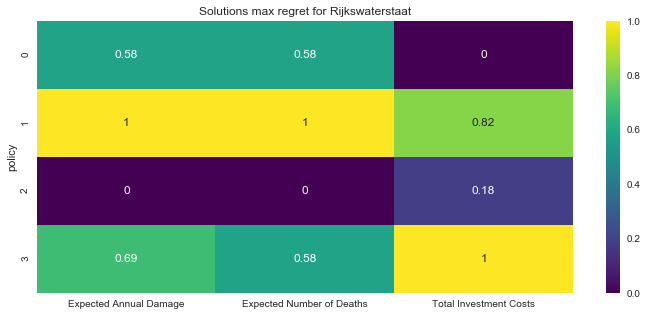

In [20]:
# The regret for each outcome of interest is shown for each solution, scored from 0-1. This is plotted, using a heatmap
sol_max_regret = pd.DataFrame(sol_max_regret)
sns.heatmap(sol_max_regret/sol_max_regret.max(), cmap='viridis', annot=True)
plt.title('Solutions max regret for Rijkswaterstaat')
plt.show()


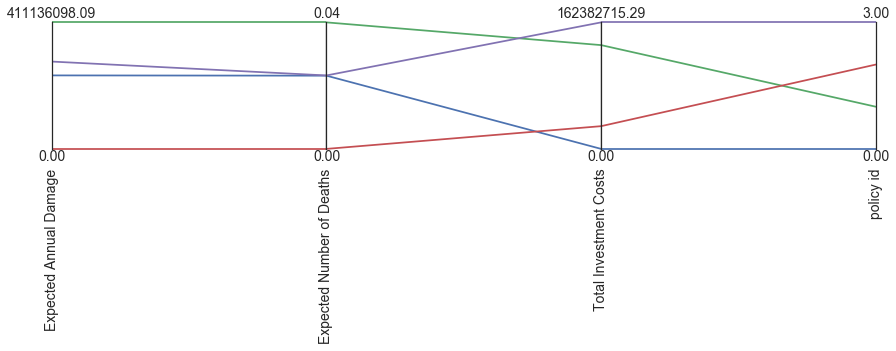

In [22]:
# In order to identify which policy belongs to which regret-trade-off line, the policy ID's are added to the parcoords plot
solution_data = sol_max_regret

# makes it easier to identify the policy associated with each line
# in the parcoords plot
solution_data['policy id'] = solution_data.index.astype("float64")

solution_limits = parcoords.get_limits(solution_data)
solution_limits.loc[0, ['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths']] = 0

paraxes = parcoords.ParallelAxes(solution_limits)
paraxes.plot(solution_data)


plt.show()